<a href="https://colab.research.google.com/github/nirajband/FMML_Projects_and-Labs/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Introduction to Convolutional Neural Networks (CNNs).

In [ ]:
# Convolutional Neural Networks (CNNs) are a class of deep neural networks designed primarily for image processing and other grid-like data.
# CNNs are composed of convolutional layers, pooling layers, and fully connected layers.
# The convolutional layers apply filters to the input data to extract features, while pooling layers reduce the spatial dimensions of the data, making the network computationally efficient.
# Fully connected layers are used for high-level reasoning and classification.

In [2]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [3]:
# Transform for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 35223055.87it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1, 1)  # Input channels = 3, output channels = 32
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/782], Loss: 1.8089
Epoch [1/10], Step [200/782], Loss: 1.5092
Epoch [1/10], Step [300/782], Loss: 1.1620
Epoch [1/10], Step [400/782], Loss: 1.1424
Epoch [1/10], Step [500/782], Loss: 1.0424
Epoch [1/10], Step [600/782], Loss: 1.0586
Epoch [1/10], Step [700/782], Loss: 0.8210
Epoch [2/10], Step [100/782], Loss: 0.8526
Epoch [2/10], Step [200/782], Loss: 1.0447
Epoch [2/10], Step [300/782], Loss: 0.5853
Epoch [2/10], Step [400/782], Loss: 0.8341
Epoch [2/10], Step [500/782], Loss: 0.8227
Epoch [2/10], Step [600/782], Loss: 0.8110
Epoch [2/10], Step [700/782], Loss: 0.7715
Epoch [3/10], Step [100/782], Loss: 0.6481
Epoch [3/10], Step [200/782], Loss: 0.7606
Epoch [3/10], Step [300/782], Loss: 0.6982
Epoch [3/10], Step [400/782], Loss: 0.7316
Epoch [3/10], Step [500/782], Loss: 0.8051
Epoch [3/10], Step [600/782], Loss: 0.5794
Epoch [3/10], Step [700/782], Loss: 0.6996
Epoch [4/10], Step [100/782], Loss: 0.5459
Epoch [4/10], Step [200/782], Loss: 0.5447
Epoch [4/10

In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 73.41%


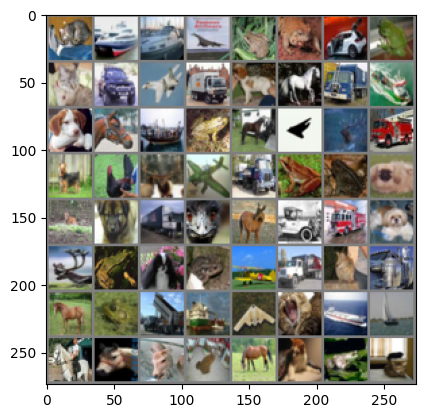

Predicted:  cat ship ship ship


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Predict the labels
images = images.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Print the images with predicted labels
images = images.cpu()
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))